The dataset contains information on global power plants, including attributes such as the country, name, capacity, location, fuel type, and estimated power generation over several years. Here’s a proposed workflow to build a classification machine learning model using this dataset.

Workflow for Classification Model
1. Data Preprocessing
Load the Data: Import the dataset and inspect its contents.
Handle Missing Values: Identify and handle any missing values using strategies such as imputation or removal.
Feature Selection:
Identify relevant features for the classification task.
Drop irrelevant or redundant columns (e.g., gppd_idnr, url, etc.).
Categorical Encoding: Convert categorical features (e.g., country, primary_fuel) into numerical values using techniques like One-Hot Encoding or Label Encoding.
Data Normalization: Normalize numerical features to ensure all features contribute equally to the model.
Feature Engineering (if necessary): Create new features or modify existing ones to better capture the underlying patterns in the data.
2. Data Splitting
Train-Test Split: Split the dataset into training and testing sets, typically with a 70-30 or 80-20 ratio.
Stratified Splitting (if necessary): Ensure that the distribution of the target variable is consistent across training and testing sets.
3. Model Selection
Model Choice: Consider models like Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, or Support Vector Machines (SVM) based on the complexity of the data.
Hyperparameter Tuning: Use techniques such as Grid Search or Random Search to find the best hyperparameters.
4. Model Training
Fit the Model: Train the chosen model on the training dataset.
Cross-Validation: Use cross-validation to assess the performance of the model and ensure it generalizes well.
5. Model Evaluation
Evaluation Metrics: Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC curve.
Confusion Matrix: Generate a confusion matrix to visualize the performance of the classification model.
6. Model Interpretation
Feature Importance: Analyze the importance of different features in the model’s decision-making process.
Model Explainability: Use tools like SHAP or LIME to explain the model's predictions.
7. Model Deployment
Model Serialization: Save the trained model using techniques like joblib or pickle for future use.
API Development: Develop an API for the model if you plan to integrate it into an application.
8. Model Monitoring and Maintenance
Monitor Performance: Track the model’s performance over time to detect any degradation.
Retrain as Needed: Periodically retrain the model with new data to ensure it remains accurate and relevant.


In [1]:
!pip install pandas numpy scikit-learn maplotlib seaborn

ERROR: Could not find a version that satisfies the requirement maplotlib (from versions: none)
ERROR: No matching distribution found for maplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:


# Update the file path to the correct location
file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

data = pd.read_csv(file_path)

# Display the first few rows
data.head()


C:\Users\silve\AppData\Local\Temp\ipykernel_10080\3806671210.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\silve\AppData\Local\Temp\ipykernel_10080\3806671210.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing target values (if any)
# data.dropna(subset=['target_column_name'], inplace=True)

# Example: Fill missing numerical values with the mean
data.fillna(data.mean(), inplace=True)

# Example: Fill missing categorical values with the mode
data.fillna(data.mode().iloc[0], inplace=True)


country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


TypeError: unsupported operand type(s) for +: 'int' and 'str'

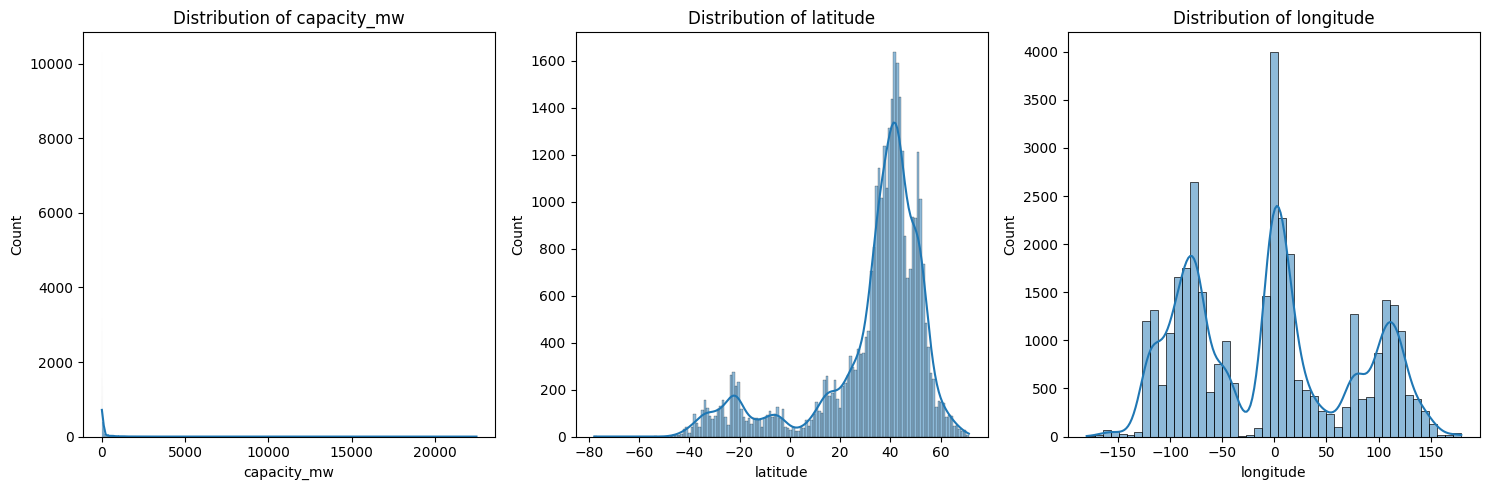

In [5]:
# Visualize the distribution of numerical features
numerical_features = ['capacity_mw', 'latitude', 'longitude']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [6]:
# List of columns to drop
irrelevant_columns = [
    'name',            # Name of the power plant
    'gppd_idnr',       # Unique ID for the power plant
    'country',         # Country code (possibly redundant with latitude/longitude)
    'country_long',    # Full name of the country
    'wepp_id',         # Another identifier
    'source',          # Data source (might not be useful for modeling)
    'url',             # URL to source (not useful)
    'owner',           # Owner of the plant (may not be relevant)
    'geolocation_source', # Source of geolocation data
    'year_of_capacity_data', # Year of capacity data
    # Add any other columns you consider irrelevant
]

# Drop the irrelevant columns from the dataset
data = data.drop(columns=irrelevant_columns)

# Verify the remaining columns
print(data.columns)


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'commissioning_year',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


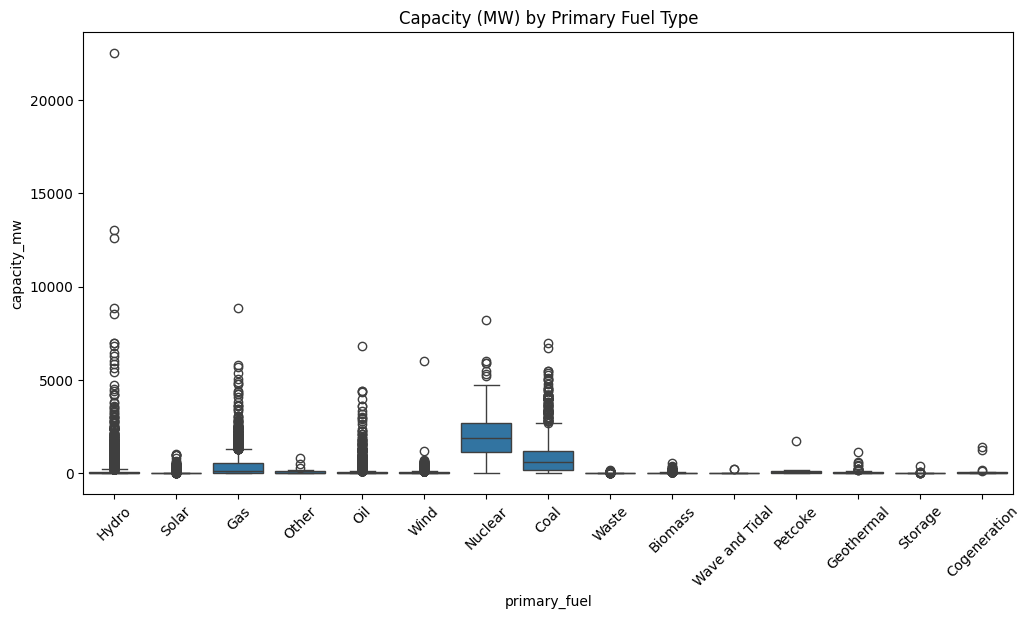

In [7]:
# Boxplot of capacity_mw by primary_fuel
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=data)
plt.title('Capacity (MW) by Primary Fuel Type')
plt.xticks(rotation=45)
plt.show()


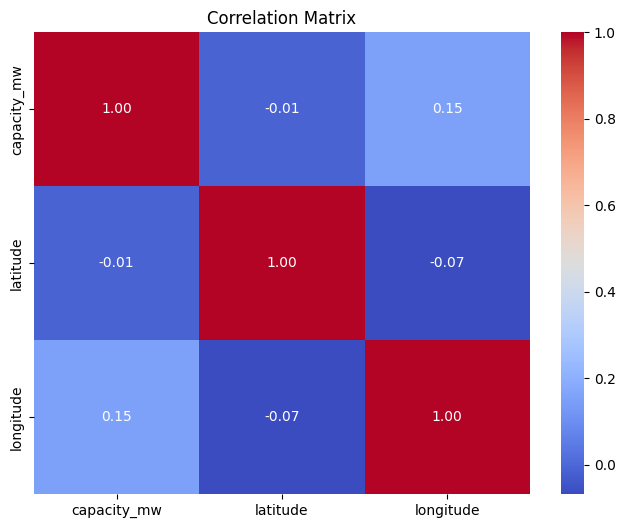

In [8]:
# Calculate the correlation matrix
corr_matrix = data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


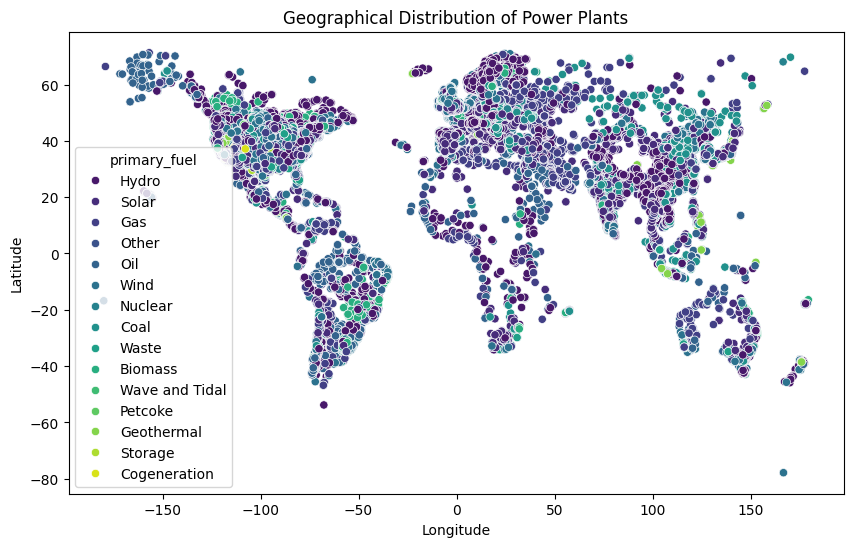

In [9]:
# Scatter plot of power plants by geographical location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=data, palette='viridis')
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\silve\AppData\Local\Temp\ipykernel_10080\4209614695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='primary_fuel', data=data, palette='viridis')


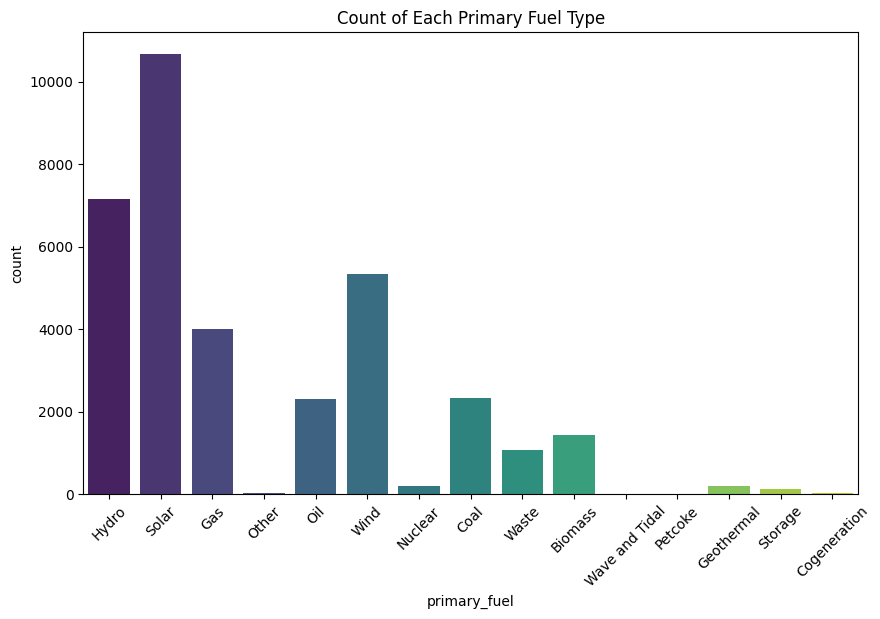

In [10]:
# Count plot of primary fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=data, palette='viridis')
plt.title('Count of Each Primary Fuel Type')
plt.xticks(rotation=45)
plt.show()


C:\Users\silve\AppData\Local\Temp\ipykernel_10080\4209614695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='primary_fuel', data=data, palette='viridis')


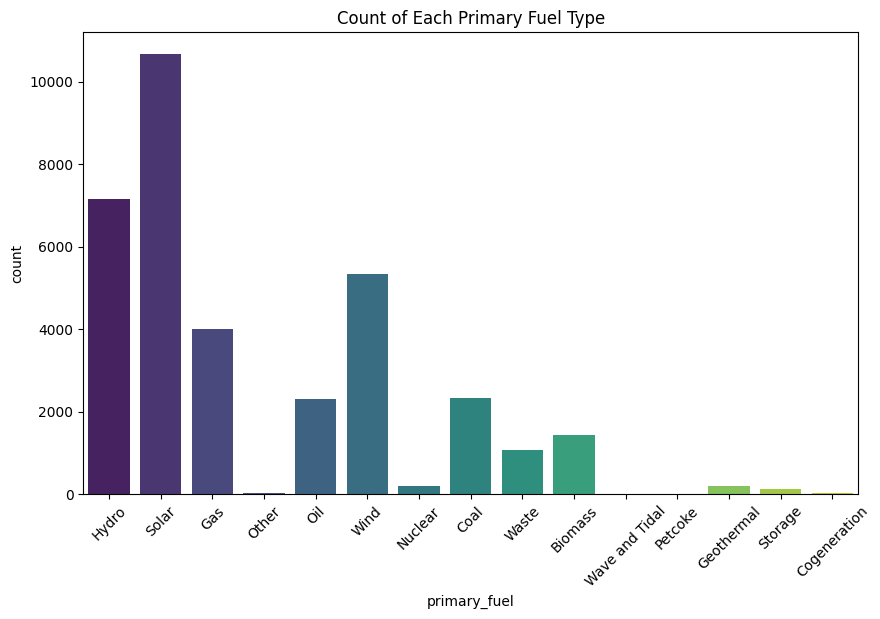

In [11]:
# Count plot of primary fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=data, palette='viridis')
plt.title('Count of Each Primary Fuel Type')
plt.xticks(rotation=45)
plt.show()


C:\Users\silve\AppData\Local\Temp\ipykernel_10080\2780805195.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Model: Logistic Regression
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       667
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00      1195
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00      2153
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00       686
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00      3194
          11       1.00      1.00      1.00        48
          12       1.00      1.00      1.00       324
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00      1635

    accuracy                           1.00     10481
   macro avg       1.00      1.00   

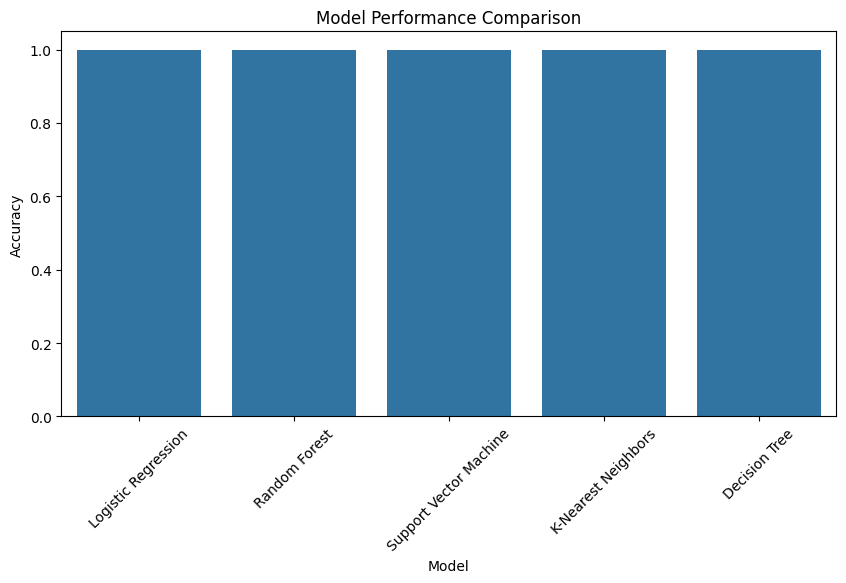

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'
data = pd.read_csv(file_path)

# 2. Drop irrelevant columns
irrelevant_columns = [
    'name', 'gppd_idnr', 'country', 'country_long', 'wepp_id',
    'source', 'url', 'owner', 'geolocation_source', 'year_of_capacity_data'
]
data = data.drop(columns=irrelevant_columns)

# 3. Select relevant features and preprocess the data
features = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel']
X = data[features]

# Encode categorical variables
X = pd.get_dummies(X, columns=['primary_fuel'], drop_first=True)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['primary_fuel'])

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# 6. Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Create a pipeline with standard scaling and the model
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

# 7. Display the model performance comparison
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data has already been loaded and preprocessed
# For example:
# file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'
# data = pd.read_csv(file_path)

# Select relevant features and preprocess the data
# features = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel']
# X = data[features]
# X = pd.get_dummies(X, columns=['primary_fuel'], drop_first=True)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(data['primary_fuel'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Create a pipeline with standard scaling and the model
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

# Display the model performance comparison
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [30]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data has already been loaded and preprocessed
# For example:
# file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'
# data = pd.read_csv(file_path)

# Select relevant features and preprocess the data
# features = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel']
# X = data[features]
# X = pd.get_dummies(X, columns=['primary_fuel'], drop_first=True)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(data['primary_fuel'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Create a pipeline with standard scaling and the model
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

# Display the model performance comparison
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # <- Corrected line, parentheses are closed
plt.show()



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

C:\Users\silve\AppData\Local\Temp\ipykernel_10080\3160794797.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Model: Logistic Regression
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       667
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00      1195
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00      2153
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00       686
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00      3194
          11       1.00      1.00      1.00        48
          12       1.00      1.00      1.00       324
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00      1635

    accuracy                           1.00     10481
   macro avg       1.00      1.00   

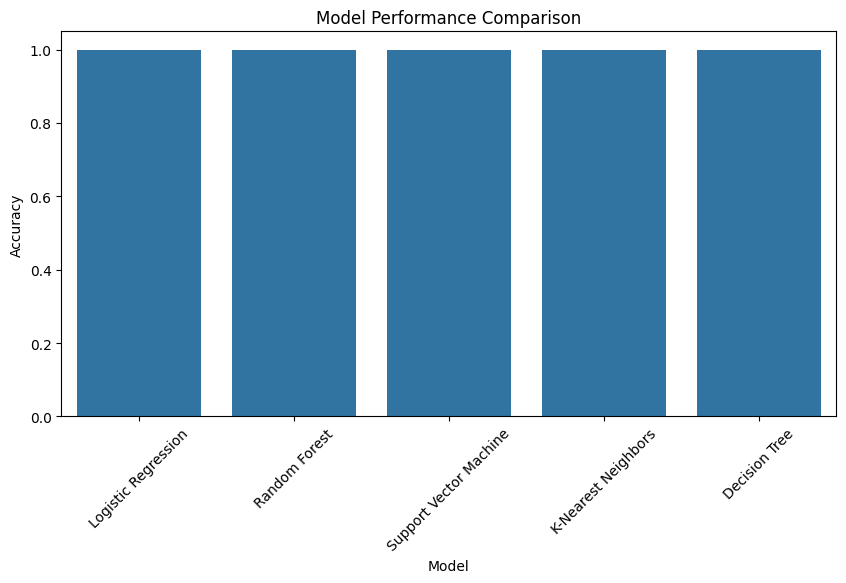

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'
data = pd.read_csv(file_path)

# 2. Select relevant features and preprocess the data
features = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel']
X = data[features]

# Encode categorical variables
X = pd.get_dummies(X, columns=['primary_fuel'], drop_first=True)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['primary_fuel'])

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# 5. Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Create a pipeline with standard scaling and the model
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

# 6. Display the model performance comparison
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and y_train have been defined and preprocessed
# Train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Get the feature names (assuming X was created with get_dummies or similar)
feature_names = X_train.columns


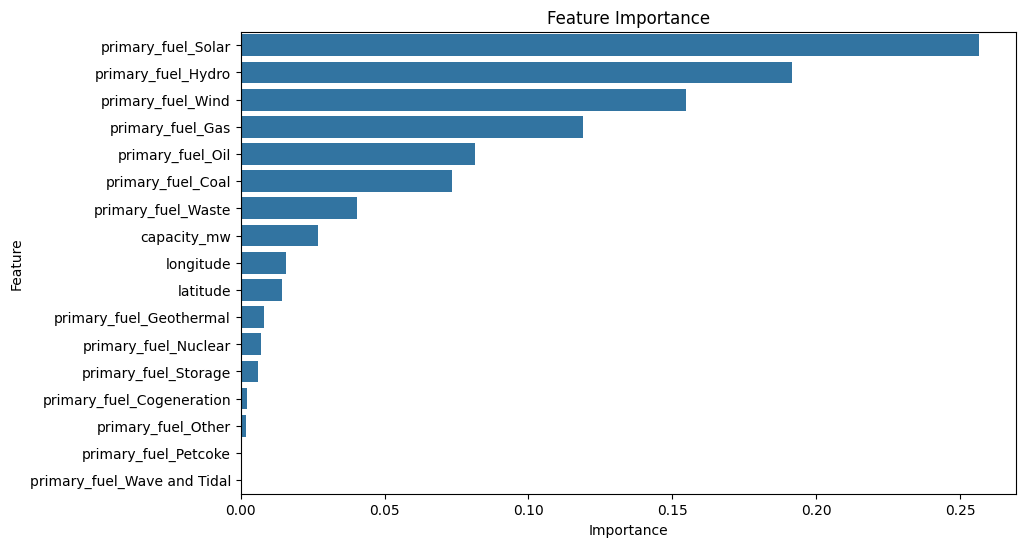

In [19]:
# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [20]:
# Define bins for capacity_mw
bins = [0, 50, 200, data['capacity_mw'].max()]
labels = ['Low', 'Medium', 'High']

# Create a new target variable with the bins
data['capacity_binned'] = pd.cut(data['capacity_mw'], bins=bins, labels=labels, right=False)

# Encode the binned target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['capacity_binned'])


In [21]:
# Define bins for capacity_mw
bins = [0, 50, 200, data['capacity_mw'].max()]
labels = ['Low', 'Medium', 'High']

# Create a new target variable with the bins
data['capacity_binned'] = pd.cut(data['capacity_mw'], bins=bins, labels=labels, right=False)

# Encode the binned target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['capacity_binned'])


In [22]:
# Classify the predictions into bins
y_pred_binned = pd.cut(y_pred_continuous, bins=bins, labels=labels, right=False)

# Encode the predicted bins
y_pred_binned_encoded = label_encoder.transform(y_pred_binned)

# Encode the actual bins (test set)
y_test_binned_encoded = label_encoder.transform(pd.cut(y_test, bins=bins, labels=labels, right=False))


NameError: name 'y_pred_continuous' is not defined

C:\Users\silve\AppData\Local\Temp\ipykernel_10080\2852019784.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


R² Score: 0.2621
Classification Accuracy: 0.3733

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.73      0.63      1607
           1       0.86      0.27      0.41      7294
           2       0.17      0.49      0.25      1579
           3       0.00      0.00      0.00         1

    accuracy                           0.37     10481
   macro avg       0.39      0.37      0.32     10481
weighted avg       0.71      0.37      0.42     10481



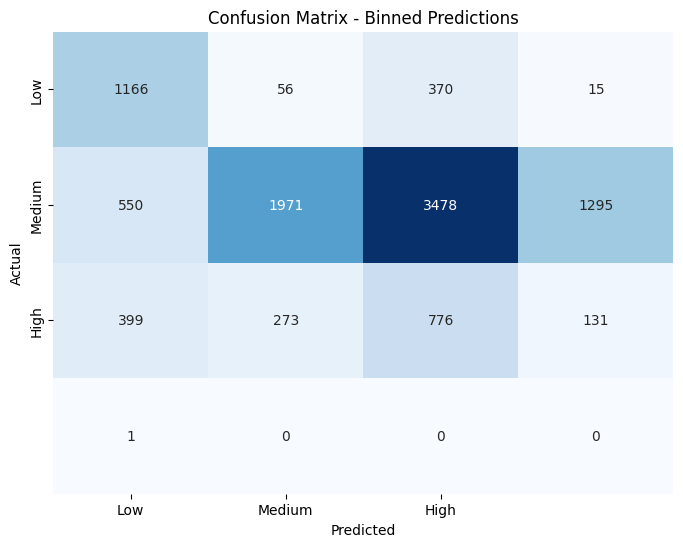

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'
data = pd.read_csv(file_path)

# 2. Drop irrelevant columns
irrelevant_columns = [
    'name', 'gppd_idnr', 'country', 'country_long', 'wepp_id',
    'source', 'url', 'owner', 'geolocation_source', 'year_of_capacity_data'
]
data = data.drop(columns=irrelevant_columns)

# 3. Bin the target variable (capacity_mw)
bins = [0, 50, 200, data['capacity_mw'].max()]
labels = ['Low', 'Medium', 'High']
data['capacity_binned'] = pd.cut(data['capacity_mw'], bins=bins, labels=labels, right=False)

# Encode the binned target variable
label_encoder = LabelEncoder()
y_binned = label_encoder.fit_transform(data['capacity_binned'])

# 4. Select features and preprocess the data
features = ['latitude', 'longitude', 'primary_fuel']
X = pd.get_dummies(data[features], drop_first=True)

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['capacity_mw'], test_size=0.3, random_state=42)

# 6. Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred_continuous = regression_model.predict(X_test)

# 7. Classify the predictions into bins
y_pred_binned = pd.cut(y_pred_continuous, bins=bins, labels=labels, right=False)

# Encode the predicted bins
y_pred_binned_encoded = label_encoder.transform(y_pred_binned)

# Encode the actual bins (test set)
y_test_binned_encoded = label_encoder.transform(pd.cut(y_test, bins=bins, labels=labels, right=False))

# 8. Evaluate the model

# Calculate R² score for regression
r2 = r2_score(y_test, y_pred_continuous)
print(f"R² Score: {r2:.4f}")

# Classification report for binned predictions
accuracy = accuracy_score(y_test_binned_encoded, y_pred_binned_encoded)
print(f"Classification Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_binned_encoded, y_pred_binned_encoded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binned_encoded, y_pred_binned_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Binned Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
savefig()

NameError: name 'savefig' is not defined

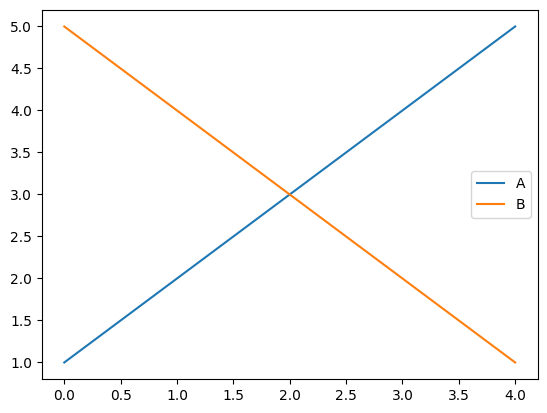

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

# Plotting
df.plot()

# Save the plot to a file
plt.savefig('my_plot.png')


In [26]:
import pandas as pd

# Sample DataFrame
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [5, 4, 3, 2, 1]
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)


           Variable1  Variable2
Variable1        1.0       -1.0
Variable2       -1.0        1.0


In [27]:
import pandas as pd

# Sample DataFrame
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [5, 4, 3, 2, 1]
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)


           Variable1  Variable2
Variable1        1.0       -1.0
Variable2       -1.0        1.0


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load the dataset
file_path = r'C:\Users\silve\Downloads\global_power_plant_database.csv'
data = pd.read_csv(file_path)

# 2. Drop irrelevant columns
irrelevant_columns = [
    'name', 'gppd_idnr', 'country', 'country_long', 'wepp_id',
    'source', 'url', 'owner', 'geolocation_source', 'year_of_capacity_data'
]
data = data.drop(columns=irrelevant_columns)

# 3. Bin the target variable (capacity_mw)
bins = [0, 50, 200, data['capacity_mw'].max()]
labels = ['Low', 'Medium', 'High']
data['capacity_binned'] = pd.cut(data['capacity_mw'], bins=bins, labels=labels, right=False)

# Encode the binned target variable
label_encoder = LabelEncoder()
y_binned = label_encoder.fit_transform(data['capacity_binned'])

# 4. Select features and preprocess the data
features = ['latitude', 'longitude', 'primary_fuel']
X = pd.get_dummies(data[features], drop_first=True)

# 5. Feature Engineering

# a. Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# b. Log Transformation of capacity_mw
X['log_capacity'] = np.log1p(data['capacity_mw'])

# c. Interaction Features: primary_fuel * capacity_mw
X['fuel_capacity_interaction'] = X['log_capacity'] * X['primary_fuel_Hydro']

# d. Frequency Encoding for primary_fuel
fuel_counts = data['primary_fuel'].value_counts()
X['primary_fuel_freq'] = data['primary_fuel'].map(fuel_counts)

# e. Clustering-Based Features
kmeans = KMeans(n_clusters=5, random_state=42)
X['cluster'] = kmeans.fit_predict(X)

# f. Dimensionality Reduction using PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_poly)  # Applying PCA to the polynomial features

# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, data['capacity_mw'], test_size=0.3, random_state=42)

# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\silve\AppData\Local\Temp\ipykernel_10080\4185994563.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
